# 12. Data Visualisation 

Data visualisations such as graphs and diagrams often make it easier for researchers to explore patterns and trends within large data sets, or to identify notable exceptions to the trends that can be observed. 

During the last number of years, a large number of visualisation libraries have been developed for the Python language. Examples include [Bokeh](https://bokeh.org/), [Plotly](https://plotly.com/python/), [Altair](https://altair-viz.github.io/) and [Folium](https://python-visualization.github.io/folium/). 


One of the earliest visualisation libraries in Python is called [matplotlib](https://matplotlib.org/). This library is very powerful, but its code can easily get quite complicated and wieldy. The visualisation library [seaborn](https://seaborn.pydata.org/api.html) can be viewed as  as extention and a simplification of `matplotlib`. According to its [documentation](http://seaborn.pydata.org/index.html), `seaborn` "provides a high-level interface for drawing attractive and informative statistical graphics". You can use `seaborn` to create fairly complicated visualisations using a limited number of functions, and, fortunately, much of the processing takes place behind the scenes. A second important advantage of `seaborn` is that it works well in combination with `pandas`, a Python library for data analysis.

This tutorial also explains a number of visualisations that can be created using `seaborn` and `matplotlib`.

## The data to be visualised

Data visualisations are obviously based on data. This tutorial makes use of a dataset named 'bli.csv'. This file contains data collected for the 2018 Better Life Index, which was created by the [OECD](https://www.oecdbetterlifeindex.org/) to visuale some of the key factors that contribute to well-being in OECD countries, including education, income, housing and environment. The data set is included in the 'Data' folder created for this tutorial. If you cannot locate this dataset, you can also download it from the following address: https://edu.nl/bcm4x


In [1]:
import pandas as pd
import os

path_to_csv = os.path.join('Data','bli.csv')
df = pd.read_csv(path_to_csv)

## Importing seaborn and matplotlib

Before you can work with `seaborn`, you need to import this package. It is customary to import `seaborn` under the alias 'sns'. 

We also need to import `matplotlib`'s ```pyplot``` module. The code below uses the alias 'plt'. The ```pyplot``` module can be used to customise `seaborn` plots. The ```pyplot``` module can be used to change the nature and the appearance of plots.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

## A bar plot

Bar plots can be created using the `barplot()` method. It demands a `data` parameter, which need to refer to a `pandas` dataframe containing the values you want to visualise. 

Additionally, we need supply two variables: (1) the values to be shown on the X-axis and (2) the values to be shown on the Y-axis. These values need to be passed as the `x` and the `y` parameters, respectively. The `y` parameter, more concretely, specifies the height of the bars that are drawn. Optionally, you can also use the `color` parameter to specify a fixed fill colour for the bars in the plot. This parameter need to be assigned a hexadecimal code for colours. To find such hexadecimal codes, you can make use of a [colour picker tool](https://g.co/kgs/9W4qA3).

The code below visualises the level of air pollution in the various countries described in the BLI dataset. Note that the code also sorts the values found for the variable 'air_pollution' in a descending order, using the `pandas` method `sort_values()`. As a result of this, the values will be shown in a specific order: from highest to lowest. 

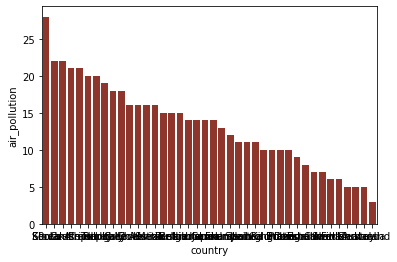

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x_axis = 'country'
y_axis = 'air_pollution'

df_sorted = df.sort_values(by=[ y_axis] , ascending = False)

sns.barplot( data= df_sorted , x=x_axis, y= y_axis, color = '#9e291c'  )

plt.show()

## Customisations

Clearly, the appearance of the barplot can still be improved in a number of ways. One difficulty is that the label on the X-axis cannot be read, because of the fact that they overlap. We may also want to increase the size of the plot, to enhance the readability. Customisations such as these can be done via `matplotlib` methods. 

The `figure()` method, firstly, has a `figsize` parameter, which can be assigned a tuple with two integer values. The first of these specifies the width, and the second integer specifies the height. 
As values for the `figsize` parameter, you can specify the width and the height of the graph in inches.  

We can solve the issue with the overlapping labels on the X-axis by rotating them. The orientation of these labels can be changed using the `xticks()` method from `matplotlib`.

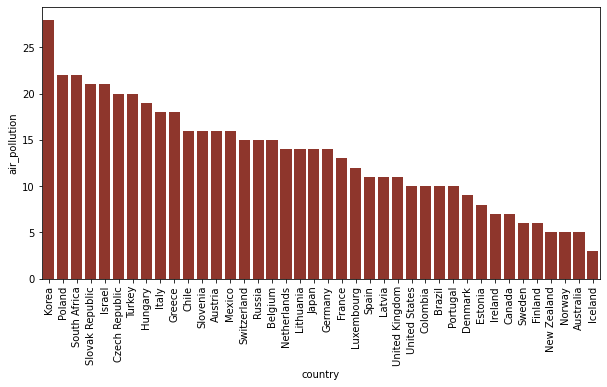

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x_axis = 'country'
y_axis = 'air_pollution'

fig = plt.figure( figsize=( 10 , 5 ) )

sns.barplot( data= df_sorted , x=x_axis, y= y_axis, color = '#9e291c'  )

plt.xticks(rotation= 90)


plt.show()

It is good practice, furthermore, to annotate the plot to make it easier for viewers to understand what the visualisation actually shows. To do this, you can work with a number of `seaborn` methods. 

By default, `seaborn` prints the names of the columns that are visualised along the X-axis and the Y-axis. If you want to show different labels, you can provide these via the `set_xlabel()` and `set_ylabel()` methods. The string to be displayed needs to be used as a first parameter. Optionally, you can supply a `size` parameter to change the font size. `set_title()` can be used to add a main title above the plot. 

Note that these `seaborn` functions need to be applied to the grapg that is created by the `barplot()` method. To be able to this, this result of `barplot()` needs to be assigned to a variable. In the example below, the result is assigned to a variable named `graph`. The methods to add the labels and the title can then be applied to this `graph` variable.  

To make sure that the graph is rendeded properly, it is advisable to end the code with the command `plt.show()`.

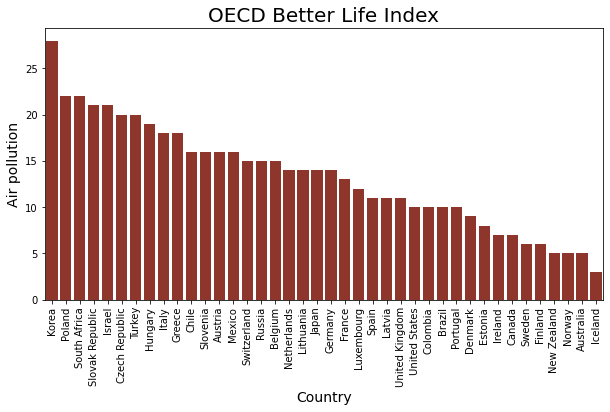

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x_axis = 'country'
y_axis = 'air_pollution'

fig = plt.figure( figsize=( 10 , 5 ) )

df_sorted = df.sort_values(by=[ y_axis] , ascending = False)

graph = sns.barplot( data= df_sorted , x=x_axis, y= y_axis, color = '#9e291c'  )

graph.set_title('OECD Better Life Index' , size = 20) 
graph.set_xlabel('Country' , size = 14) 
graph.set_ylabel('Air pollution' , size = 14 )

plt.xticks(rotation= 90)

plt.show()


## Categorical variables

Categorical variables are variables which can be used to divide observations into smaller groups. They can divide the observations in the dataset over a number of categories. The values for such categorical variables are usually taken from a limited set of options. These options are often strings, such as 'low', 'medium' or 'high'. 

In a `seaborn` barplot, you can easily visualise the different categories that are available via the fill colour of the bars. In the `barplot()` method, you can work with a parameter named `hue`. When you mention the name of a categorirical variable as a value for this `hue` parameter, the different groups that can be created will all be shown in a different colour. In addition, a legend will be added to clarify the meaning of these colours. 

To avoid overlapping bars, you need to set the value of the `dodge` parameter to 'False'. 

If the code still includes a `color` paramater, the plot will clarify the different groups using *shades* of this specific colour. If `hue` is used *without* the `color` parameter, and without the `palette` parameter that is discussed below, `seaborn` will select the colours for the different groups automatically.  

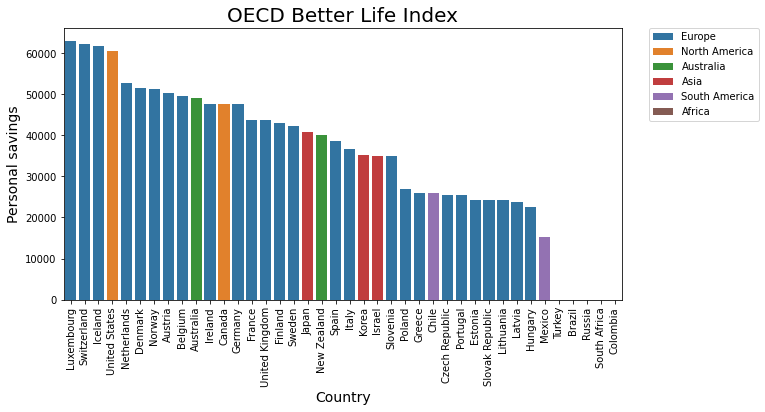

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x_axis = 'country'
y_axis = 'personal_earnings'
hue = 'continent'

fig = plt.figure( figsize=( 10 , 5 ) )

df_sorted = df.sort_values(by=[ y_axis] , ascending = False)

graph = sns.barplot( data=df_sorted , x=x_axis, y=y_axis, hue=hue , dodge=False )

graph.set_title('OECD Better Life Index' , size = 20) 
graph.set_xlabel('Country' , size = 14) 
graph.set_ylabel('Personal savings' , size = 14 )

plt.xticks(rotation= 90)
# The next line places the legend outside out the plot
plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.);


plt.show()

If you don't particularly like the colour that `seaborn` has chosen, it is good to know that it is also possible to select the colours yourself. As a first step, you can create a list of the colours you want to work with. 

In [7]:
colours = [ '#c7c4af' , '#0e9e30', '#a0061a' , '#6a55d4' , '#cf8817'  ] 

When you do this, you need to make sure that the number of colours in this list is equal to or greater than the number of categories in the categorical value you work with. In our current example, the colours are determined by the values in the 'continent' column. The dataset has information about countries on five continents, so we need to make sure that the list named `colours` has at least five items. Once we have created the list of colours, we can use this list as a value for the `palette` parameter. 

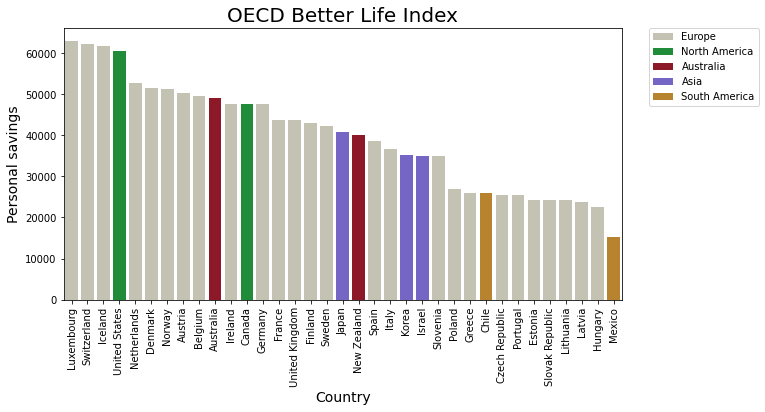

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x_axis = 'country'
y_axis = 'personal_earnings'
hue = 'continent'

fig = plt.figure( figsize=( 10 , 5 ) )

colours = [ '#c7c4af' , '#0e9e30', '#a0061a' , '#6a55d4' , '#cf8817'  ] 


df_sorted = df.sort_values(by=[ y_axis] , ascending = False)
df_sorted = df_sorted.dropna(subset = [x_axis, y_axis])


graph = sns.barplot( data= df_sorted , 
                        x=x_axis, 
                        y= y_axis, 
                        hue = hue , 
                        dodge = False , 
                        palette = colours )

graph.set_title('OECD Better Life Index' , size = 20) 
graph.set_xlabel('Country' , size = 14) 
graph.set_ylabel('Personal savings' , size = 14 )

plt.xticks(rotation= 90)
# The next line places the legend outside out the plot
plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.);


plt.show()

## Colour palettes

Next to specifying all the colours yourself, you can also make use of one of `seaborn`'s predefined [colour pallettes](https://seaborn.pydata.org/tutorial/color_palettes.html). You can choose from several tens of predefined palettes. The list below only mentions some of the possibilities. 

* hls
* Blues 
* Reds
* Greens
* crest
* PiYG
* BuGn
* GnBu
* OrRd
* YlOrRd
* pastel
* colorblind
* dark
* Paired
* flare
* husl
* Set1
* Set2
* Set3

Be aware that the names of these palletes are case-sensitive. The names of these palettes can be used in the `color_palette()` method. 

In [9]:
sns.color_palette("PiYG")

[(0.8129181084198386, 0.2544405997693195, 0.5693194925028835),
 (0.9348712033833141, 0.6798154555940021, 0.8312187620146096),
 (0.9856978085351787, 0.9031910803537101, 0.9458669742406767),
 (0.9202614379084968, 0.9629373317954633, 0.8576701268742792),
 (0.6908881199538641, 0.8624375240292197, 0.4883506343713959),
 (0.38269896193771624, 0.6403690888119954, 0.18108419838523643)]

The pallette returns a set of six colour by default. If you need less or more numbers, you can specify an integer to indicate the needed number of colours as a second parameter. 

In [10]:
sns.color_palette("Paired",10 )

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509)]

Such palettes can also be applied usefully in `seaborn` visualisations. To find out how many colours we need for a specific column, we can work with the `unique()` method from `pandas`. 

In [11]:
hue = 'continent'
nr_categories = df[hue].unique().shape[0]

This number can then be used as the second parameter in the `color_palette()` method. Once we have such a list of numbers, this list can be used in the `palette` attribute of the plotting function. 

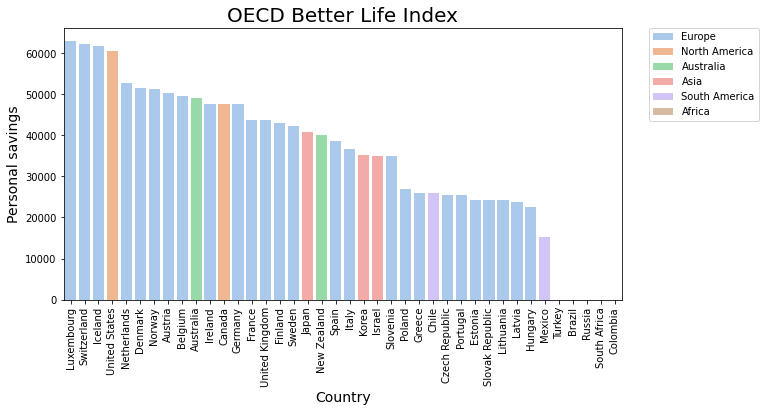

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x_axis = 'country'
y_axis = 'personal_earnings'
hue = 'continent'

fig = plt.figure( figsize=( 10 , 5 ) )

nr_categories = df[hue].unique().shape[0]
colours = sns.color_palette('pastel' , nr_categories )

df_sorted = df.sort_values(by=[ y_axis] , ascending = False)

graph = sns.barplot( data= df_sorted , 
                        x=x_axis, 
                        y= y_axis, 
                        hue = hue , 
                        dodge = False , 
                        palette = colours )

graph.set_title('OECD Better Life Index' , size = 20) 
graph.set_xlabel('Country' , size = 14) 
graph.set_ylabel('Personal savings' , size = 14 )

plt.xticks(rotation= 90)
# The next line places the legend outside out the plot
plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.);


plt.show()

## A scatter plot

A scatter plot is a data visualisation that makes use of dots to represent the values of two numerical variables. Scatter plots can be created using the `scatterplot()` method. The parameters for this method are largely the same as those for `barplot()`. The `data` parameter needs to refer to a `pandas` dataframe containing the dataset you want to visualise. The parameters `x` and `y` specify the variables (i.e. the columns) from this dataset that you want to display on the X-axis and the Y-axis, respectively. 

You can specify a fixed colour for the points using the `color` parameter, and the size of the points can be set using the `s` parameter.  

As is the case for the barplot, you can change the size of the figure via the `figure()` method from `matplotlib`'s `pyplot` module. 

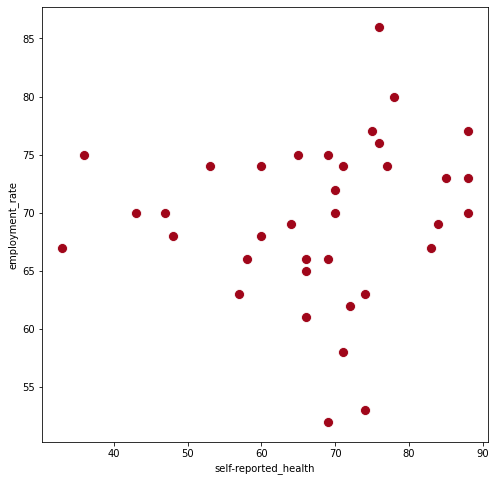

In [13]:
fig = plt.figure( figsize = ( 8,8 ))

x_axis = 'self-reported_health'
y_axis =  'employment_rate'

ax = sns.scatterplot( data = df , x = x_axis , y = y_axis , color = '#a0061a' , s = 100 ) 

plt.show()

## Annotating text annotation on a scatterplot


In the scatterplot above, it is clearly difficult to understand what the various dots mean. Which countries are actually shown on this plot? Once you have created the scatterplot, you can use the `text()` method from `pyplot` to add descriptive labels to the points. 

You need to provide values for the following parameters: 
* `x`: the position of the label on the X-axis
* `y`: the position of the label on the Y-axis
* `s`: the text to be displayed. 


The `text()` function adds one label at a time. If your data is in a `pandas` dataframe, you can work with `iterrows()` to navigate across all the rows in the dataframe. 

You can also work with a number of additional parameters to manipulate the typography of the labels.

* `color`: font colour of the label
* `weight`: 'bold' or 'semibold'
* `fontsize`: a floating point number to specify the size of the font
* `alpha`: a floating point number in betgeen 0 and 1, representing the opacity (or transparency). 


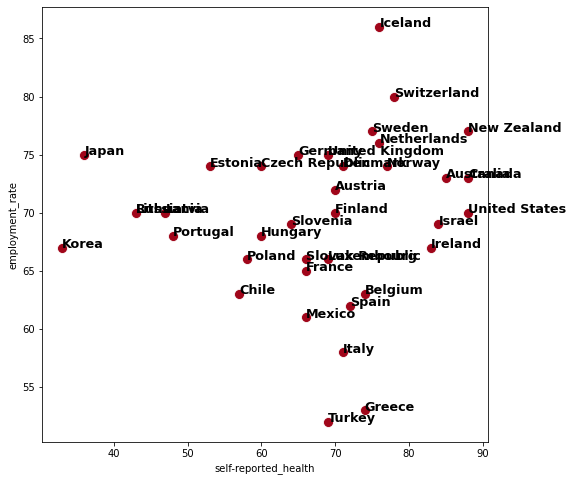

In [14]:
fig = plt.figure( figsize = ( 8,8 ))

x_axis = 'self-reported_health'
y_axis =  'employment_rate'

df = df.dropna(subset = [x_axis, y_axis])
ax = sns.scatterplot( data = df , x = x_axis , y = y_axis , color = '#a0061a' , s = 100 ) 

for index, row in df.iterrows():
    plt.text( row[x_axis],row[y_axis],row['country'], 
             fontsize=12.8,  
              weight='semibold')

plt.show()


The `text()` method places the start of the label on the exact same spot as the dots in the scatterplot. For aesthetic reasons, you may want to change the location of the labels just slightly. To change the initial location of the label, you can add or subtract some values to the positions on the X-axis and the Y-axis. Finding the suitable values often demands some trial and error. 


`seaborn` normally infers the limits of the X-axis and the Y-axis from your data. In some cases, however, you may want to adjust the limits of the axes yourself. When you add labels to a scatter plot, some of the text may partly be shown outside of the plot, as you can see in the graph above. In such situations, it can be useful to adjust the range of the values that are shown on the horizontal and the vertical axes. 

As is illustrated, you can do this via `set()`, from `seaborn`. The `xlim` and and the `ylim` parameters for this method both demand a tuple with two values: the lowest value and the highest value. These two numbers determine the range of values that you will see on the X-axis and the Y-axis. As you try to optimise the values for these ranges, it can be helpful to work with the `min()` and the `max()` methods, which can be applied to `pandas` Series. These methods return the highest and the lowest values in a Series containing numerical values. 

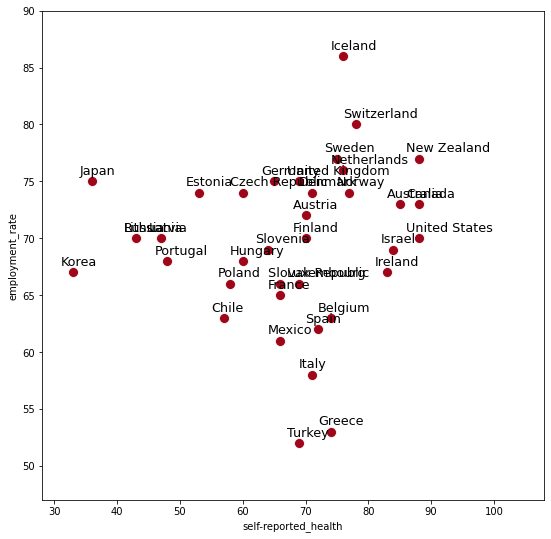

In [15]:

fig = plt.figure( figsize = ( 9,9 ))

x_axis = 'self-reported_health'
y_axis =  'employment_rate'

df = df.dropna(subset = [x_axis, y_axis])
g = sns.scatterplot( data = df , x = x_axis , y = y_axis , color = '#a0061a' , s = 100 ) 

g.set(xlim=( df[x_axis].min()-5, df[x_axis].max()+20))
g.set(ylim=( df[y_axis].min()-5, df[y_axis].max()+4 ))

for index, row in df.iterrows():
    plt.text( row[x_axis]-2,row[y_axis]+0.6,row['country'], 
             fontsize=12.8 )

plt.show()


## Conveying information via sizes and colours 

As we saw earlier, the `hue` parameter can be used to visualise the values of a categorical variable through the use of colour. This `hue` parameter can be used in a scatterplot as well. When you associate the `hue` with a categorical variable, the colours of the points in the scatter plot will indicate the categories they belong to. 

Secondly, you can also specify that the *sizes* of the points should vary along with the values in a specific column. You can do this by supplying the name of this column as the value of the `size` parameter. 

When the actual values in the column that you associate with the `size` parameter are too small or too big, you can rescale these values using the `sizes` parameter. This parameter demands two values: a minimum size and a maximum size. The values of the column that is mentioned in `size` will then be rescaled, on the range that is determined by these minimum and maximum values. 

When the `hue` and/or the `size` parameter is used in the `scatterplot()` method, `seaborn` will add a legend automatically. 

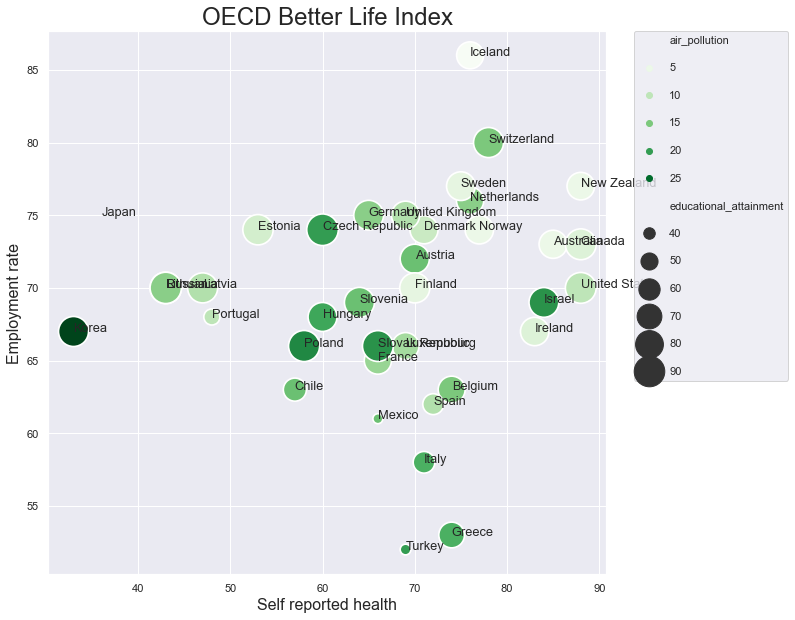

In [16]:

x_axis = 'self-reported_health'
y_axis =  'employment_rate'
point_size =  'educational_attainment'
point_colour = 'air_pollution' 

df = df.dropna(subset = [x_axis, y_axis])

fig = plt.figure( figsize = ( 10,10 ))


## This line adds spacing in between the lines of the legend 
sns.set(rc = {'legend.labelspacing': 1.6})

ax = sns.scatterplot( data=df, x=x_axis, y=y_axis,  
                     hue= point_colour, size= point_size, sizes=( 100 , 1000) , 
                         palette="Greens" )

for index, row in df.iterrows():
    plt.text( row[x_axis], row[y_axis] , row['country'] , fontsize=12.8)


ax.set_xlabel( 'Self reported health'  , fontsize = 16 )
ax.set_ylabel( 'Employment rate'  , fontsize = 16 )
ax.set_title( 'OECD Better Life Index' , fontsize=24 )


# this next line places the legend outside of the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

plt.savefig( 'scatterplot.png' , dpi=300 )

## Changing the plot style

The overall style of the plot, including the background colour and the presence of the of grid lines, can be modified using `set_style()`. 

The following styles have been defined in `seaborn`: 

* darkgrid
* whitegrid
* dark
* white
* ticks


In [17]:
sns.set_style("darkgrid")

## Saving an image

To save the image that is created, you can work with the `savefig()` method. Within the parentheses, you should firstly supply a filename for the image. You can optionally provide the `dpi` method as well. This parameters specific the number of dots per inch. 

Next to opening the graph in a viewer on your screen, using show(), it is also possible to instruct Python to create an image file on your computer, via the ```savefig()``` method. As the first parameter to this function, you must provide a filename. The filename must include an extension, such as ‘jpeg’, ‘tiff’, ‘png’ or ‘pdf’. The methods savefig() and show() are mutually exclusive. When you use one of these, you cannot use the other. 



In [18]:
plt.savefig( 'scatterplot.png' , dpi=300 )

<Figure size 432x288 with 0 Axes>

## A line plot

With `seaborn`, we can also create many other types of visualisations. To create a line plot, for example, you can use the `lineplot()` method. The line plot can be customised via the following parameters: 

* `color`: the color of the line
* `linewidth`: Expectedly, the width of the line
* `linestyle`: Options include: 
    * '--'
    * '.-'
    * ':'
    * 'dotted'
    * 'dashed'
    * 'solid'



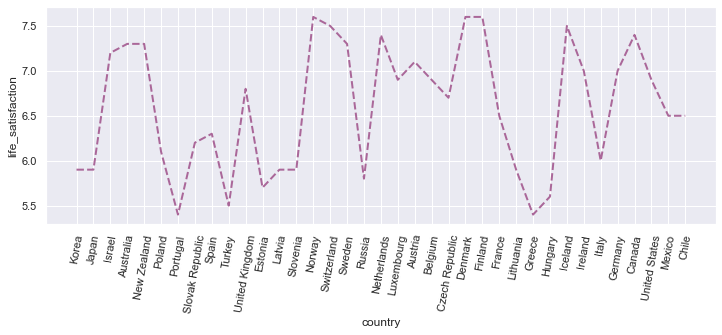

In [19]:
y_axis ="life_satisfaction"
df_sorted = df.sort_values(by=[ 'continent'] , ascending = True)


fig = plt.figure( figsize = ( 12, 4))
ax = sns.lineplot(data=df_sorted, x="country", y="life_satisfaction", 
                  color= '#AA6799', linestyle='dashed',linewidth=2 )
plt.xticks(rotation= 80)
plt.show()

## A count plot

You can see that, using seaborn, you can create fairly advanced plots with only a few lines of code. If you want to see the number of items for each of the categories in a categorical variable, you can work with the `countplot()` method. 

The code below indicates that the OECD dataset mostly concentrates on countries in Europe. 

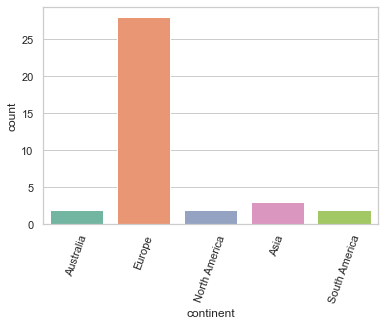

In [20]:
sns.set_style("whitegrid")
ax = sns.countplot(data= df, x="continent", palette='Set2')
plt.xticks(rotation= 70)
plt.show()

## A histogram

A countplot can be used to clarify the distribution across the options that are available for a categorical varable. 

To explore the distibution of the values of a quantitative variable, you can work with a histogram. You can create such a histogram with `histplot()`. To generate such a plot, `seaborn` divives the available values evenly in a number of ranges and then counts the number of observations belonging to each of these groups. You can also specify the number of groups to be craeted explicitly using the `bins` parameter. 

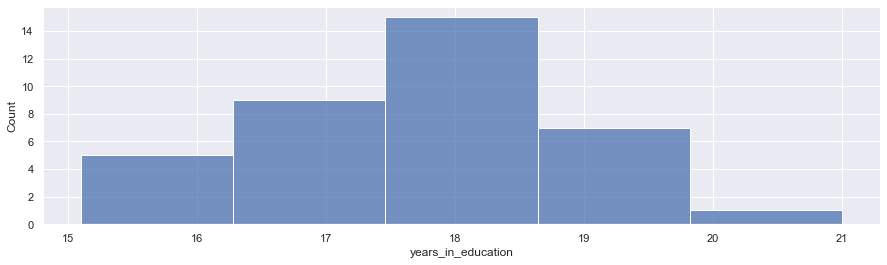

In [21]:
sns.set_style("darkgrid")
plt.figure( figsize = (15,4) )
graph = sns.histplot(data=df, x="years_in_education", bins = 5)

## A boxplot

A boxplot is a diagram which visualises the minimum, the maximum, the median and the first and third quartiles. It can be created using the `boxplot()` method. 

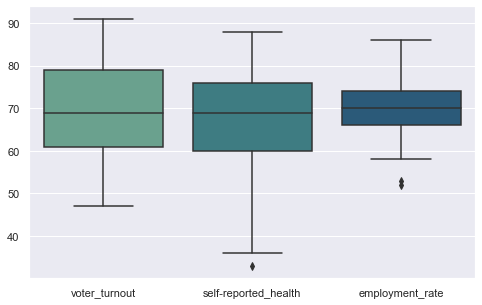

In [22]:
fig = plt.figure( figsize = ( 8, 5))

columns = ['voter_turnout','self-reported_health','employment_rate']
 
graph = sns.boxplot(data=df[ columns ] , palette = 'crest' )

## A heatmap 

Heatmaps often offer a useful way of visualising correlations in a dataset. Such correlations can be calculated using the `corr()` method from `pandas`. 

In `seaborn`, such a heatmap clarifying the correlations among the variables in the data set can be created using only a few lines of code. The method to be used is named `heatmap()`. This method demands a two-dimensional matrix containing the values to be shown. The colours can be specified using the `cmap` parameter. As values, you can use the colour palettes that are predefined by `seaborn`.  

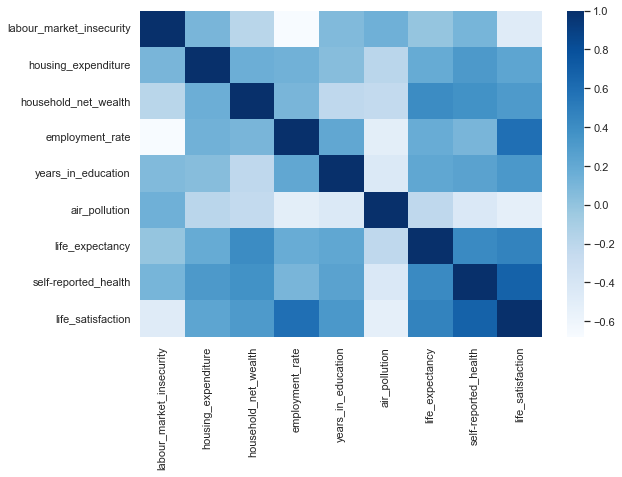

In [23]:
columns = ['labour_market_insecurity',
           'housing_expenditure',
           'household_net_wealth',
       'employment_rate', 
           'years_in_education', 'air_pollution',
        'life_expectancy',
       'self-reported_health', 'life_satisfaction']

plt.figure(figsize=(9,6))
## Correlations can be calculated using pandas' corr() 
correlations = df[columns].corr()
 
# Heatmap
ax = sns.heatmap(correlations, cmap = 'Blues')

## Density plot

Density regions can be shown using `kdeplot()`.

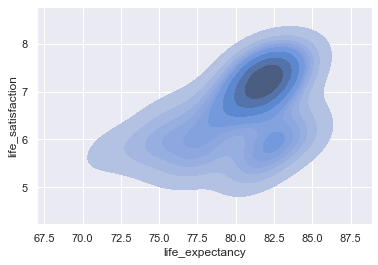

In [24]:
graph = sns.kdeplot( data = df , x= 'life_expectancy' , 
                    y = 'life_satisfaction' , shade=True )

Many other types are diagrams can be created. For more information, visit the [gallery](https://seaborn.pydata.org/examples/index.html) or the [tutorials](https://seaborn.pydata.org/tutorial.html) on the seaborn website. 

# Exercises

## Exercise 12.1

PISA is the OECD's [Programme for International Student Assessment](https://www.oecd.org/pisa/). This programme evaluates educational systems globally by measuring the performance of 15 year-old-children in mathematics, science and reading. The latest study is from 2018.

The data folder of this tutorial includes a CSV file named '[pisa.csv](https://edu.nl/p97ma)'. It contains all the scores measured for mathematics and reading in between 2000 and 2018.  

Using Pandas, Matplotlib and Seaborn, create visualisations which can help to answer the following questions:

12.1.1. How did the various countries that were examined in 2018 perform on the reading tests? Which countries had the highest scores, and which countries had the lowest scores? Try to answer this question via a bar plot. You can limit the analyses to the the 'total' scores (i.e. those records in which column 'object' has value 'TOT'). Create a figure with a size of 10x7, rotate the x-tick labels by 90 degrees and use the colour '#910c26'' for all the bars. 

In [25]:
path_to_csv = os.path.join('Data','pisa.csv')
df = pd.read_csv(path_to_csv)

## All scores received for reading in 2018
df_2018 = df[ (df['subject'] == 'TOT') & (df['year'] == 2018)  ]
df_2018 = df_2018.sort_values(by=[ 'pisa_read'] , ascending = False)



12.1.2. Same as 12.1.1., but try to give information about the continents as well. Use distinctive colours for each continent. 

2.1.3. 
How do the scores for reading compare to the scores for mathematics? Focus on the scores obtained in 2018. Answer this question by creating a scatter plot. 

2.1.4. Same as (3), but add labels to indicate the scores for the countries captured in the list named `countries`, defined below. 

```
countries = [ 'Netherlands', 'France' , 'Germany' , 'Belgium', 'Luxembourg','Italy']
```

In [26]:
countries = [ 'Netherlands', 'France' , 'Germany' , 'Belgium', 'Luxembourg','Italy']

2.1.5. How did the scores for reading develop in the Netherlands in between 2000 and 2018? Focus on the total scores. Create a linepliot with the following specifications: 

* color: '#94321c’
* linewidth: 3 
* Size of the plot: 10 x 3
* Graph title: ‘Reading performance in the Netherlands’


In [27]:
# Scores received by Dutch students
df_nl = df[ df['location_name'] == 'Netherlands' ]

# Scores received by all Dutch students
df_nl_tot = df_nl[ df_nl['subject'] == 'TOT' ] 


2.1.6. How did the scores for maths develop in the Netherlands in between 2000 and 2018? Focus on the score for boys and for girls separately. 

In [28]:
# Scores for boys and girls separately 
df_nl_bg = df_nl[ df_nl['subject'].isin( ['BOY','GIRL']  ) ]

2.1.7. Have the scores remained relatively stable over the years if we look at the total scores? Or has there been some variation? How does the variation of the scores for the Netherlands compare to the scores in France, Germany, Belgium and Luxembourg? Try to answer this question by crearing a boxplot. 

## Exercise 12.2

The data folder of this tutorial includes a CSV file named 'nobel.csv'. If necessary you can also download this file from the following address: [https://edu.nl/3xmbd](https://edu.nl/3xmbd). 

Visualise the data in this data set in the following ways.

* Create a linechart in Seaborn to visualize the number of Nobel laureates per year. Can we find support for the claim that people increasingly need to share their Nobel Prizes with colleagues? 
* What are the nationalities of the Nobel laureates in the data set? Try to generate a bar plot which displays the various countries on the x-axis and the number of Nobel Prize winners produced by these countries on the y-axis. Limit your analysis to the countries listed in `countries` below.

```
    countries = ['Netherlands', 'France', 'Switzerland', 'India', 'Sweden',
       'Norway', 'United Kingdom', 'Spain', 'Russia', 'Poland', 'Germany',
       'Italy', 'United States of America', 'Belgium', 'Australia',
       'Ireland', 'Canada', 'Argentina', 'Japan', 'China', 'Brazil',
       'Bulgaria']
```


* Examine the relation between the age of the Nobel laureate and year in which the prize was awarded. Do winners get younger, on average? Limit your analysis to the Prizes awarded in Chemistry and to laureates born after 1930. To answer this and the next question, you may reuse code developed for exercise 11.1.
* Create a boxplot to visualise the age distribution per category. 


In [29]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

response = requests.get('https://edu.nl/3xmbd')
if response:
    data = response.text
    with open('nobel.csv' , 'w') as csv:
        csv.write(data)
        
df = pd.read_csv('nobel.csv')

In [30]:
# extract the year of birth from the birth date
df['Birth Year'] = pd.to_datetime(df['Birth Date']).dt.year

# calculate age by subtracting birth year from year of nobel prize 
df['Age'] = df['Year'] - df['Birth Year']

## group by year
laureates_per_year = df.groupby('Year')['Laureate ID'].count()

## convert the result of 'group by' to data frame
lpg_df = laureates_per_year.to_frame()
lpg_df = lpg_df.reset_index()
columns = ['Year','Number']
lpg_df.columns = columns


countries = ['Netherlands', 'France', 'Switzerland', 'India', 'Sweden',
       'Norway', 'United Kingdom', 'Spain', 'Russia', 'Poland', 'Germany',
       'Italy', 'United States of America', 'Belgium', 'Australia',
       'Ireland', 'Canada', 'Argentina', 'Japan', 'China', 'Brazil',
       'Bulgaria']

df_countries = df[ df['Birth Country'].isin(countries) ]

# group by countries
laureates_per_country = df_countries.groupby('Birth Country')['Laureate ID'].count()
lpg_df = laureates_per_country.to_frame()

# Rename the columns
lpg_df = lpg_df.reset_index()
columns = ['Country','Number']
lpg_df.columns = columns

# Sort countries by number of laureates
lpg_df = lpg_df.sort_values(by=['Number'] , ascending = False)


## Exercise 12.3

In exercise 11.3, you created a CSV file named 'prices_of_coffee_over_time.csv', containing data about the average price of a pound of coffee on a range of dates. Use this CSV file to create a line chart which visualises the development of these prices over time. 